# Lesson 13, Workalong 02: Plotting geospatial data

This workalong shows how to use `rioxarray` to read a raster file (a GeoTIFF in this case) to add topography to our plot.  It also shows some tricks for getting good-looking topo plots.

In [1]:
""" Import libraries """
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl
from osgeo import gdal, osr
import cartopy
import numpy as np
import cmocean

mpl.style.use('seaborn-v0_8-poster')

In [2]:
""" Load the topo / bathymetry data. """

# set the filepath
topo_bathy_path = "https://github.com/taobrienlbl/advanced_earth_science_data_analysis/raw/09188e9e6a0cf230f8473c0ae95d2e1b9079df3a/lessons/13_geospatial_intro/data/western_us_topo_bathy_subset.tiff"

# read the topography raster data
topo_ds = gdal.Open(topo_bathy_path, gdal.GA_ReadOnly)
print(type(topo_ds))
print(topo_ds)

topo_subds = topo_ds.GetSubDatasets()
print(type(topo_subds))
print(topo_subds)

<class 'osgeo.gdal.Dataset'>
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002D9B17D55F0> >
<class 'list'>
[]


In [3]:
# check the meta data of tiff file
topo_meta = topo_ds.GetMetadata()
print(type(topo_meta))
print(topo_meta)

<class 'dict'>
{'AREA_OR_POINT': 'Area', 'DataType': 'Generic'}


In [4]:
# get the width, height and band number of the tiff file
nWidth = topo_ds.RasterXSize
nHeight = topo_ds.RasterYSize
nBandNum = topo_ds.RasterCount
print(nWidth, nHeight, nBandNum)

703 673 1


In [5]:
# get the projection and georeferencing transform information of the tiff file
topo_proj = topo_ds.GetProjection()   # WKT string
print(type(topo_proj))
print(topo_proj)

topo_geotransform = topo_ds.GetGeoTransform()
print(type(topo_geotransform))
print(topo_geotransform)

<class 'str'>
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
<class 'tuple'>
(-126.56667007429421, 0.016666671619613663, 0.0, 43.81667, 0.0, -0.01666667161961366)


In [6]:
# read the topography data into numpy array
topo_data = topo_ds.ReadAsArray()
print(type(topo_data))
print(topo_data.shape)

<class 'numpy.ndarray'>
(673, 703)


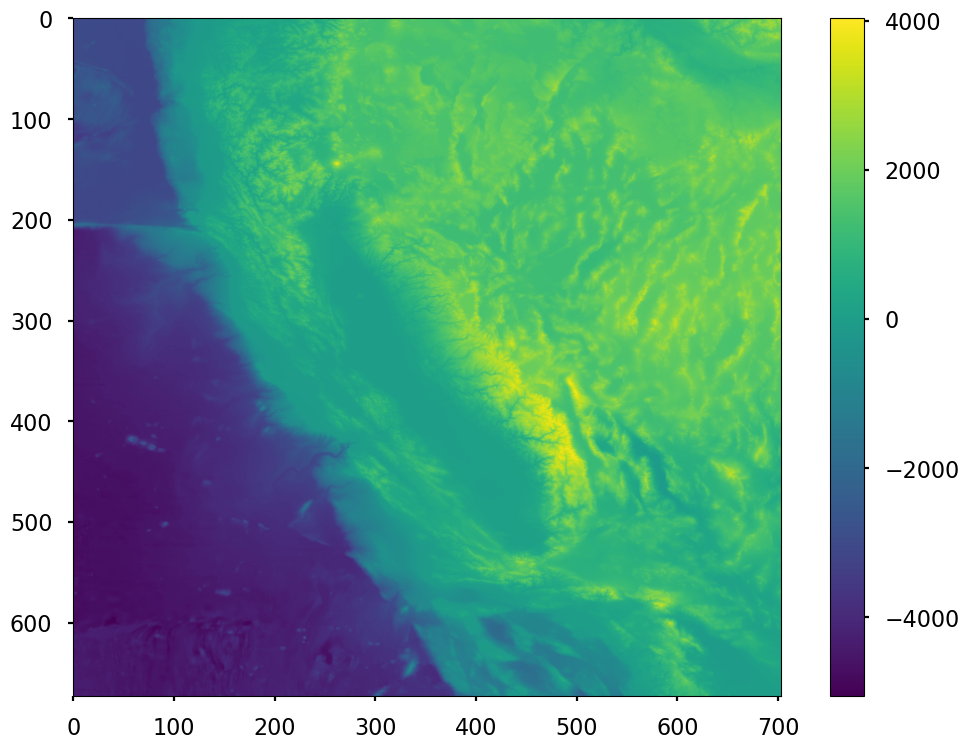

In [7]:
# check the topography data by plotting the grid
fig, ax = plt.subplots()
cplt = ax.imshow(topo_data[:,:])
fig.colorbar(cplt)

plt.show()

In [8]:
""" Load the earthquake data from the earlier exercise. """
CA_earthquake_file = "CA_earthquake.zip\\CA_earthquake.shp"

# load the shapefile
CA_earthquake_gdf = gpd.read_file(CA_earthquake_file)
CA_earthquake_gdf.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontal,depthError,magError,magNst,status,locationSo,magSource,geometry
0,1956-02-09 14:32:41.910000+00:00,31.832167,-116.230833,6.0,6.80,ms,6.0,339.0,0.9244,0.10,...,"34km ENE of Maneadero, B.C., MX",earthquake,4.34,31.61,NaN,0.0,reviewed,ci,ci,POINT (-10477288.255 3404569.259)
1,1915-11-21 00:13:42.980000+00:00,31.932000,-114.945000,10.0,6.57,mw,NaN,NaN,NaN,NaN,...,10 km SSE of Ejido Doctor Alberto Oviedo Mota ...,earthquake,NaN,3.90,0.400,NaN,reviewed,iscgem,iscgem,POINT (-10357724.394 3415249.468)
2,1954-11-12 12:26:53.750000+00:00,31.934333,-116.312667,6.0,6.09,ml,9.0,325.0,NaN,0.31,...,"30km ENE of Ensenada, B.C., MX",earthquake,9.83,31.61,0.223,5.0,reviewed,ci,ci,POINT (-10480878.523 3415499.084)
3,1934-12-30 13:52:02.690000+00:00,32.000000,-114.900000,6.0,6.33,ml,6.0,322.0,2.1690,1.23,...,"24km SSE of Estacion Coahuila, B.C., MX",earthquake,99.00,31.61,0.032,7.0,reviewed,ci,ci,POINT (-10351170.071 3422524.058)
4,1927-01-01 09:13:36.770000+00:00,32.153000,-115.764000,10.0,6.08,mw,NaN,NaN,NaN,NaN,...,"49 km SSE of Rumorosa, Mexico",earthquake,NaN,3.50,0.320,NaN,reviewed,iscgemsup,iscgemsup,POINT (-10423311.096 3438891.620)


In [9]:
""" Load the state boundary data. """
CA_boundary_file = "CA_boundary.shp.zip"
CA_boundary_gdf = gpd.read_file(CA_boundary_file)
CA_boundary_gdf.head()

,OBJECTID,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,56,4,9,06,01779778,06,CA,California,00,G4000,A,4.034672e+11,2.049980e+10,+37.1551773,-119.5434183,5.258041e+06,6.718927e+11,"MULTIPOLYGON (((-10542921.281 3496319.032, -10..."


In [10]:
""" Convert the vector data to the same projection used in the raster """
# use the original projection of the topography data
projection = topo_proj
# convert the earthquake data
CA_earthquake_gdf_proj = CA_earthquake_gdf.to_crs(projection)
# convert the CA state boundary data
CA_boundary_gdf_proj = CA_boundary_gdf.to_crs(projection)

# Note: geopandas is built on top of pyproj, so WKT string is directly supported

In [11]:
""" create the hillshade of topography data """
# set the light source for the hillshade
ls = mpl.colors.LightSource(azdeg=315, altdeg=45)

# get the x and y grid spacing
dx = topo_geotransform[1]
dy = topo_geotransform[5]

# convert the grid spacing from degrees to meters
rearth = 6371000  # in meters
dx_meters = float(np.deg2rad(dx) * rearth * np.cos(np.deg2rad(topo_geotransform[3])))
dy_meters = float(np.deg2rad(dy) * rearth)

# generate a blended hillshade
blend = ls.shade(
    topo_data,
    cmap=cmocean.cm.topo,
    vmin = -3000, vmax = 3000,
    blend_mode="hsv",
    dx=dx_meters, dy=dy_meters,
    vert_exag=10,
    )

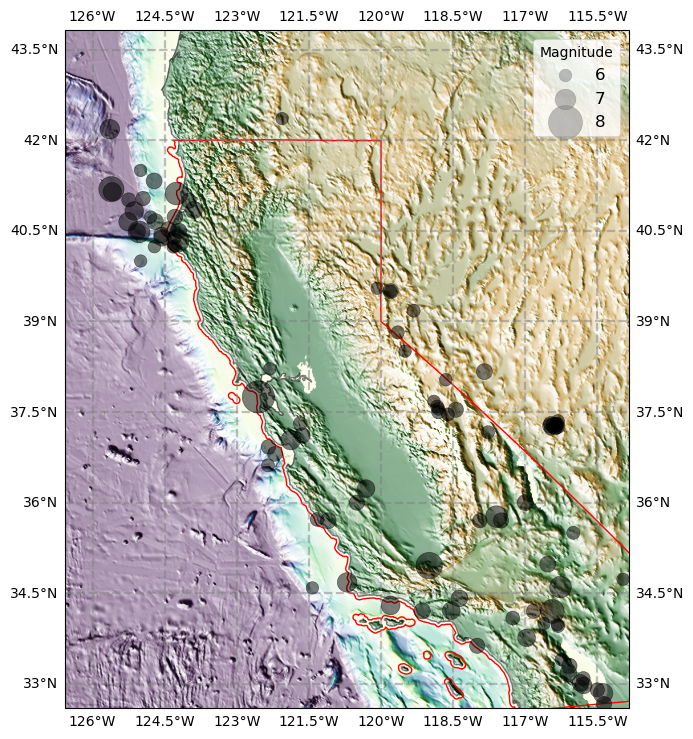

In [12]:
""" Generate a plot of earthquake locations on top of the topography / bathymetry data. """

# use the original projection of the topography data
#proj = topo_proj
""" Can't find a way to convert WKT1 string to Cartopy.crs directly. So, the projection was defined manually like the example solution 
    After checking the parameters of topo projection, it is indeed the WGS-84 EPSG:4326. So, we can use the default PlateCarree """
proj = cartopy.crs.PlateCarree()

# create the final plot
fig, ax = plt.subplots(subplot_kw={'projection': proj})

# set the extent of the plot
min_x = topo_geotransform[0]
max_x = topo_geotransform[0] + topo_geotransform[1]*nWidth
min_y = topo_geotransform[3] + topo_geotransform[5]*nHeight
max_y = topo_geotransform[3]
extent = [min_x, max_x, min_y, max_y]
ax.set_extent(extent, crs=proj)

# plot the hillshade
ax.imshow(blend, cmap="Greys", extent=extent, transform=proj, zorder=0)

# plot the earthquake locations with magnitude proportional to size
CA_earthquake_gdf_proj.plot(
    ax = ax, 
    transform = proj,
    color = "black",
    #column = 'mag',
    markersize = np.exp(CA_earthquake_gdf_proj.mag)/5,
    zorder = 10,
    alpha = 0.5
    )

# plot the CA state boundary for reference
CA_boundary_gdf_proj.plot(
    ax = ax, 
    transform = proj,
    facecolor = 'None', 
    edgecolor = 'red',
    linewidth = 1
    )

# create a legend for the marker sizes (adopted from example solution)
# set the marker sizes
sizes = [6, 7, 8]
# convert the sizes to the radii used in the plot
exp_sizes = np.exp(sizes)/5
labels = [f"{s}" for s in sizes]
# generate a plot that doesn't show any data; this is just so we can create a legend
handles = [plt.scatter([],[], s=s, color="gray", alpha=0.5) for s in exp_sizes]
# create the legend
leg = ax.legend(handles, labels, title="Magnitude", loc="upper right", fontsize=12)

# add geographic features like gridlines and coastlines (adopted from example solution)
gl = ax.gridlines(draw_labels=True, color="gray", alpha=0.5, linestyle="--")
ax.coastlines(resolution="10m", color="black", linewidth=1, alpha=0.5)

# set the extent
plt.show()

In [13]:
print(type(topo_proj))
print(topo_proj)

print(type(proj))
print(proj)

<class 'str'>
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
<class 'cartopy.crs.PlateCarree'>
+proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to_meter=111319.4907932736 +vto_meter=1 +no_defs +type=crs
